# Detecção de faces frontais a partir de vídeos

In [46]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Transformaremos o vídeo em frames para utilizá-los na detecção facial frontal

In [ ]:
#transformando o vídeo em frames
cap = cv2.VideoCapture("video.webm")
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('titulo'+str(i)+'.jpg', frame)
    i+=1
cap.release()
cv2.destroyAllWindows()

# Criando o classificador com o Haar Cascade

In [47]:
classificador = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [48]:
col_frames = os.listdir('frames/')

In [49]:
col_images = []
for i in col_frames:
    img = cv2.imread('frames/'+i)
    col_images.append(img)

# Identificando as faces frontais nos frames

In [51]:
for i in range(len(col_images)):
    facesDetectadas = classificador.detectMultiScale(col_images[i], scaleFactor = 1.2, minNeighbors = 9)
    if len(facesDetectadas) >= 1:
        for (x,y,l,a) in facesDetectadas:
            cv2.rectangle(col_images[i], (x,y), (x+l, y+a), (0,255,0),2)
            print(i)

20
21
54
61
62
63
65
66
75
77
78
80
81
83
84
120
121
122
123
124
125
155
176
177
188
190
192
207
208
209
210
211
217
219
221
223
224
225
226
227
230
231
242
243
247
253
396
397
408
409
411
412
414
415
418
419
420
421
423
424
425
426
430
432
433
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
451
452
453
454
454
455
455
456
457
459
460
461
462
463
464
465
466
467
468
469
469
470
470
471
471
472
473
474
475
476
477
478
478
479
480
481
483
484
485
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
509
510
511
512
513
514
515
516
517
518
519
520
521
523
525
533
535
564
566
568
569
571
572
573
574
575
576
577
578
579
580
581
582
584
585
586
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
630
632
634
635
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
669
670
672
674
675
676
677
678
679
680
681
682
683
685
688
689
691
692
697
698
700
702

# Visualizando as imagens

In [67]:
# visualização em uma nova janela
cv2.imshow('Teste',col_images[224])
cv2.waitKey()

-1

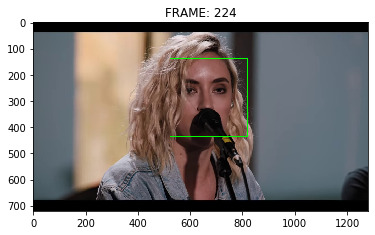

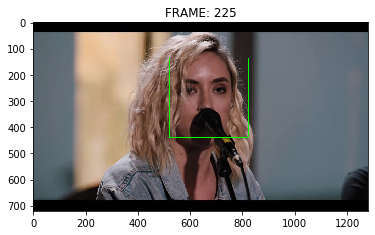

In [66]:
#visualização abaixo
i=224
for frame in [i,i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title('FRAME: '+str(frame))
    plt.show()

# Transformando em vídeo novamente

In [62]:
frame_array=[]
fps = 24.0
for i in range(len(col_images[i])):
    height, width, layers = col_images[i].shape
    size = (width, height)
    frame_array.append(col_images[i])

In [63]:
pathOut = r'frames\aha.mp4'

In [64]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()